Inertia for k=5: 65.56840815571681
Cluster Labels:
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64
Centroids:
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


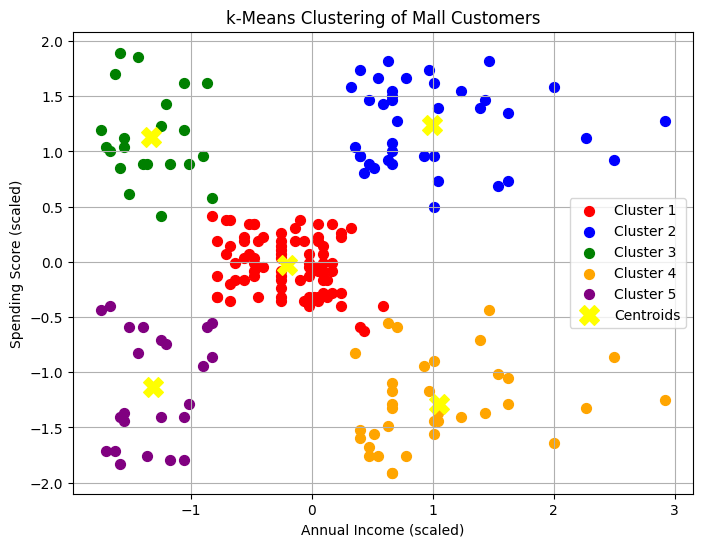

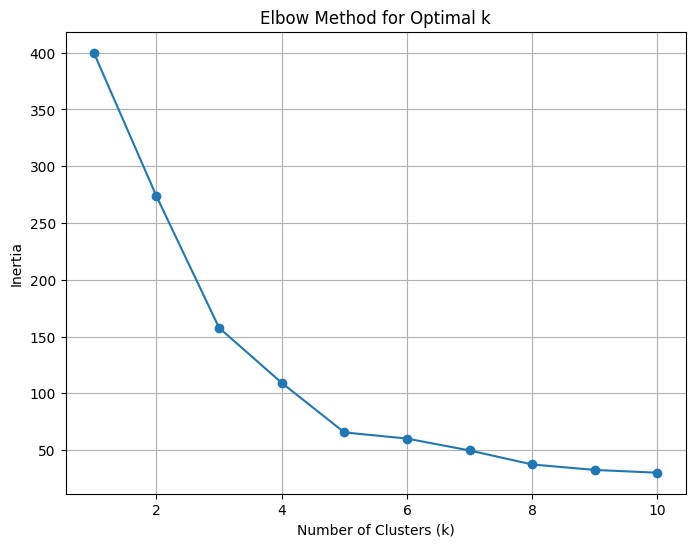

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import kagglehub

# Download the dataset using kagglehub
path = kagglehub.dataset_download("mdraiesh9648/mall-customers-dataset")

# Load the dataset
file_path = path + "/Mall_Customers.csv"  # Ensure correct file path
data = pd.read_csv(file_path)

# Select relevant features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply k-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features_scaled)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Display Inertia for k=5
print("Inertia for k=5:", kmeans.inertia_)

# Preview cluster labels and centroids
print("Cluster Labels:\n", data['Cluster'].value_counts())
print("Centroids:\n", kmeans.cluster_centers_)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster in range(5):
    cluster_points = features_scaled[kmeans.labels_ == cluster]
    plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1],
        s=50, c=colors[cluster], label=f'Cluster {cluster + 1}'
    )

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='X', label='Centroids')
plt.title("k-Means Clustering of Mall Customers")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.grid()
plt.show()

# Elbow Method for Optimal Clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()


